In [50]:
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [30]:
plt.style.use("seaborn-dark")

In [5]:
sk_data = load_iris()

In [6]:
sk_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [11]:
X, y = sk_data['data'], sk_data['target']


In [18]:
# X_data = pd.DataFrame(X, columns=sk_data["feature_names"])

C:\Users\Manu\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Manu\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Manu\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword wil

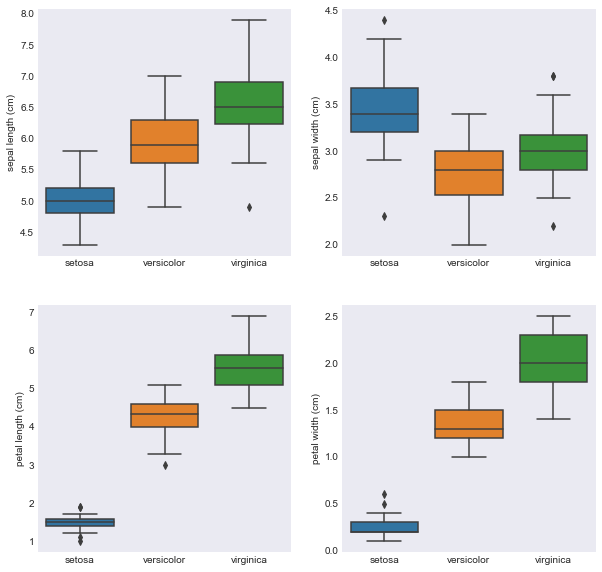

In [47]:
plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(2, 2, i+1)
    sns.boxplot(y, X[:, i])
    plt.ylabel(sk_data["feature_names"][i], fontsize=10)
    plt.xticks(plt.xticks()[0], sk_data["target_names"], fontsize=10)
plt.show()

In [48]:
def predict(X):
    x_feature = X[:, 3]
    y_predict = np.empty(x_feature.shape)

    y_predict[x_feature < 1] = 0
    y_predict[(x_feature >= 1) & (x_feature < 1.75)] = 1
    y_predict[x_feature >=1.75] = 2

    return y_predict

In [54]:
y_pred = predict(X)

In [62]:
(y_pred == y).mean() # 6/150

0.96

### Weight of evidence & Importance Value

For any feature x with c classes:

$WOE_c = \log(\frac{\%\; of\; y = 0 \; when \; x = c}{\%\; of\; y = 1\; when \; x = c})$

$IV_x = \sum_c{(\% \; of\; y = 0\; when \; x = c - \% \; of\; y = 1\; when \; x = c) \times WOE_c}$

### Hyperparameter Tuning

In [85]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
import scipy.stats.distributions as dist
from scipy.stats import norm

In [72]:
hyperparameters = {"penalty":["l1", "l2", "none"], "C":[0.5, 0.6, 1]}

In [75]:
model = GridSearchCV(LogisticRegression(), param_grid=hyperparameters)

In [76]:
model.fit(X, y)

C:\Users\Manu\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Manu\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Manu\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Manu\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\Manu\AppData\Local\Programs\

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.5, 0.6, 1], 'penalty': ['l1', 'l2', 'none']})

In [77]:
model.best_estimator_

LogisticRegression(C=0.5, penalty='none')

In [129]:
class CustomDist:
    @staticmethod
    def rvs(*args, **kwargs):
        return np.abs(norm(loc=0, scale=0.5).rvs(*args, **kwargs))

In [127]:
r_model = RandomizedSearchCV(LogisticRegression(), param_distributions={"C": CustomDist()})

In [128]:
r_model.fit(X, y)

C:\Users\Manu\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Manu\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit

RandomizedSearchCV(estimator=LogisticRegression(),
                   param_distributions={'C': <__main__.CustomDist object at 0x000001CAE4E383C8>})